# 1 Implementing Coordinate Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the "Regression.npy" dataset to perform Coordinate Descent

In [2]:
with open('regression.npy', 'rb') as f:
    X = np.load(f)
    y = np.load(f)

Normalizing the Data

In [3]:
normalized_dataset = (X - np.average(X)) / (np.std(X))
X = normalized_dataset

Splitting into Training and Testing Datasets

In [4]:
ones = np.ones(shape=X.shape[0]).reshape(-1, 1)
# Adding a ones column fo rthe bias
X = np.concatenate((ones,X), 1)
print("X_shape:\t",X.shape)
y = y.reshape(-1,1)
print("\nY_shape:\t",y.shape)
n, m = X.shape
split = int(0.8 * n)
p = np.random.permutation(n)
x_train = X[p[:split]]
y_train = y[p[:split]]
x_valid = X[p[split:]]
y_valid = y[p[split:]]
print("\nX_Train Shape : ",x_train.shape,"\nX_Valid Shape : ",x_valid.shape,"\nY_Train Shape : ",y_train.shape,"\nY_valid Shape : ",y_valid.shape)

X_shape:	 (1000, 7)

Y_shape:	 (1000, 1)

X_Train Shape :  (800, 7) 
X_Valid Shape :  (200, 7) 
Y_Train Shape :  (800, 1) 
Y_valid Shape :  (200, 1)


Defining a function to calculate the cost

In [5]:
def cost_function(X, y, param):
    cost = np.sum((X.dot(param) - y) ** 2)/(len(y))
    return cost

#### 1. Coordinate Descent.
        a) Implementing the Coordinate Descent algorithm.

In [6]:
def coordinate_descent(X, y, beta,iter):
    cost_history = []
    beta_list = [np.zeros((7,1))]
    for iteration in range(iter):
        for i in range(len(beta)):
            # Removing the Ith column from the training dataset and performinga dot product with the initial beta values after removing the ith beta value
            calculation_after_removing_ith_col = np.dot(np.delete(X, i, axis=1), np.delete(beta, i, axis=0))
            # Calculating Beta for ith column or ith feature
            beta[i] = np.dot(X[:,i].T, (y - calculation_after_removing_ith_col))/np.sum(np.square(X[:,i]))
        # Finding the cost after updating all the betas
        cost = cost_function(X, y, beta)
        # Appending the cost for every iteration so as to keep a record
        cost_history.append(cost)
        # Keeping a hostory of the beta values
        beta_list.append(np.array(beta))
    # print(beta_list)
    return beta_list,cost_history


#### Train the data
        b) Maintain a history of your β values. After training, plot them against iterations; plot the betas in a single plot. This should show you the progression of your feature values(betas) as your train the model.

In [7]:
beta_list,_ = coordinate_descent(x_train,y_train,np.zeros((7,1)),iter=100)
beta_list[-1]

array([[ 2.59311311e+00],
       [ 3.64453539e+00],
       [ 6.76131494e-04],
       [ 2.01971056e+01],
       [-6.74718670e-04],
       [ 9.62808690e+01],
       [ 2.26822082e+00]])

####    Plot Beta Values against Iterations

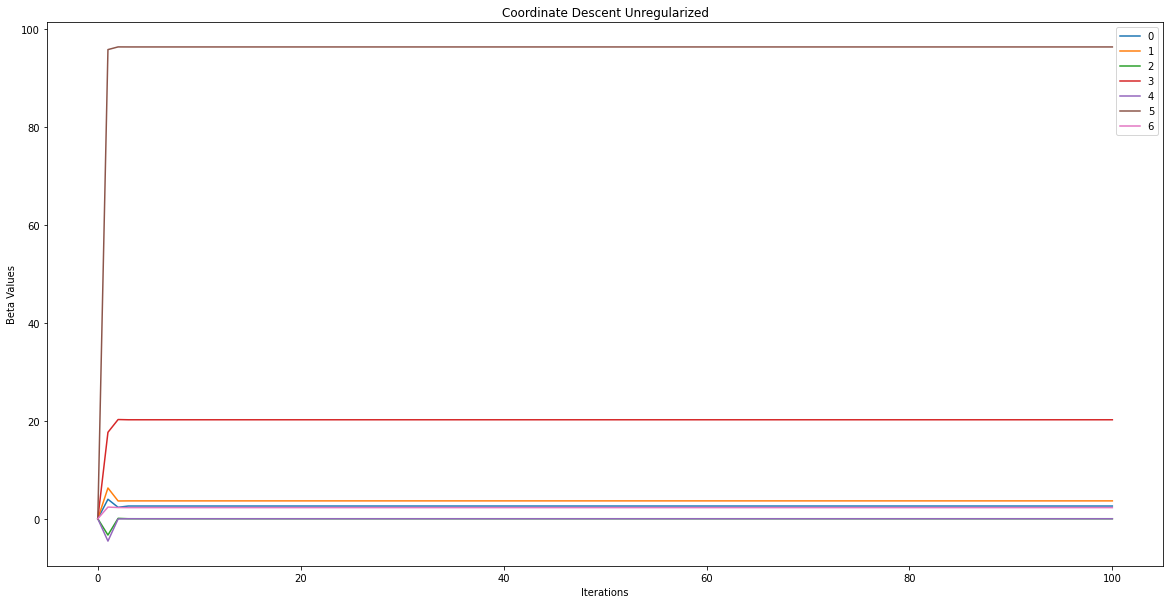

In [8]:
df = pd.DataFrame(list(map(np.ravel, beta_list)))
df.plot(title='Coordinate Descent Unregularized',figsize=(20,10),xlabel="Iterations",ylabel="Beta Values")
plt.show()

We see that the beta values get optimised after a few iterations so just we perform lesser iterations and see the results

The final updated beta values are:
 [[ 2.59311311e+00]
 [ 3.64453539e+00]
 [ 6.76131494e-04]
 [ 2.01971056e+01]
 [-6.74718670e-04]
 [ 9.62808690e+01]
 [ 2.26822082e+00]]


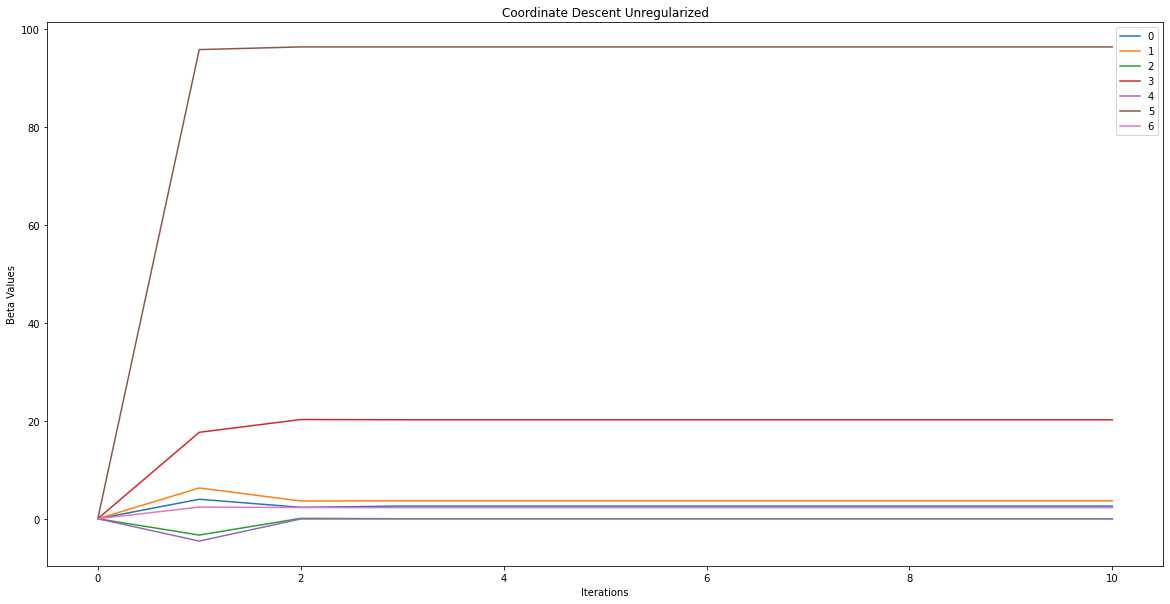

In [9]:
beta_list,_ = coordinate_descent(x_train,y_train,np.zeros((7,1)),iter=10)
print("The final updated beta values are:\n",beta_list[-1])
df = pd.DataFrame(list(map(np.ravel, beta_list)))
df.plot(title='Coordinate Descent Unregularized',figsize=(20,10),xlabel="Iterations",ylabel="Beta Values")
plt.show()

        c) Coordinate Descent with L1 Regularization 
                i. Implement CD with L1 regularization

In [10]:
# Taken from ML Slides
def soft_threshold(numerator, lamda):
    if numerator > (lamda/2):
        return (numerator - (lamda/2))
    elif numerator < (-lamda/2):
        return (numerator+ (lamda/2))
    elif np.abs(numerator) < (lamda/2):
        return 0

def coordinate_descent_lasso(X, y,beta,lamda, iter):
    cost_history = []
    betaList = [np.zeros((7,1))]
    for iteration in range(iter):
        for i in range(len(beta)):
            calculation_after_removing_ith_col = np.dot(np.delete(X, i, axis=1), np.delete(beta, i, axis=0))
            numerator = np.dot(X[:,i].T, (y - calculation_after_removing_ith_col))
            denominator = np.sum(np.square(X[:,i]))
            # Implementing Soft Threshold for Lasso Regression
            beta[i] = soft_threshold(numerator, lamda)/denominator
        cost = cost_function(X, y, beta)
        cost_history.append(cost)
        betaList.append(np.array(beta))
    return betaList,cost_history

        ii. Maintain a history of your β values. After training plot them against iterations.

In [11]:
beta_list,_ = coordinate_descent_lasso(X,y,np.zeros((7,1)),lamda=0.01,iter=100)
beta_list[-1]

array([[ 2.59340828e+00],
       [ 3.64511667e+00],
       [ 2.26965544e-04],
       [ 2.01966428e+01],
       [-1.83797343e-04],
       [ 9.62815860e+01],
       [ 2.26841201e+00]])

####    Plot Beta Values against Iterations

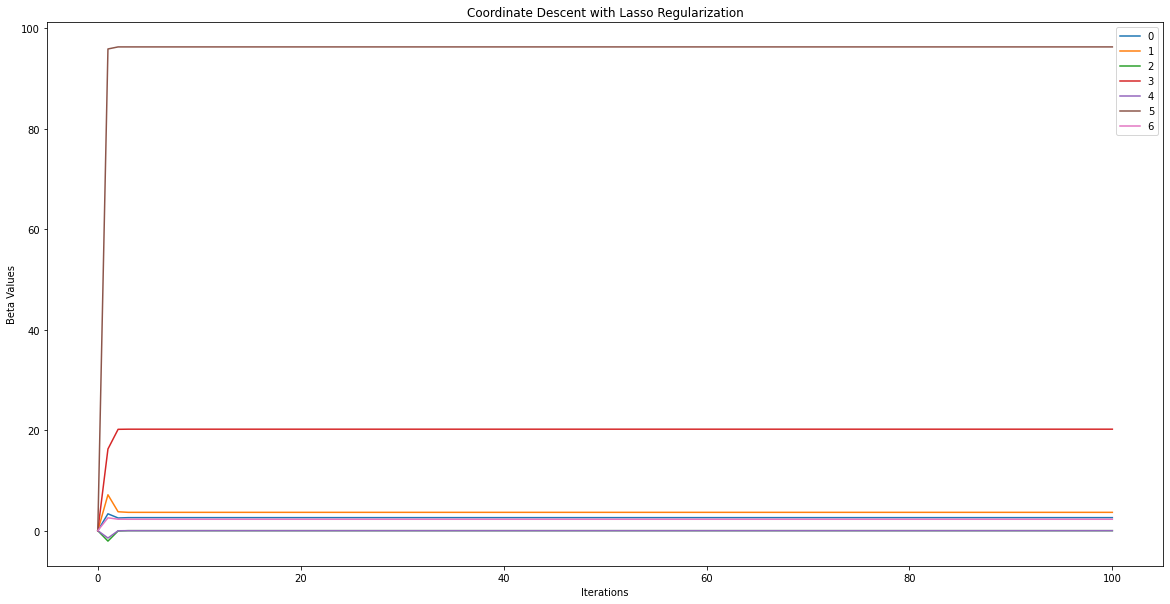

In [12]:
d = pd.DataFrame(list(map(np.ravel, beta_list)))
d.plot(title='Coordinate Descent with Lasso Regularization',figsize=(20,10),xlabel="Iterations",ylabel="Beta Values")
plt.show()

We see that the beta values get optimised after a few iterations so just we perform lesser iterations and see the results

The final updated beta values are:
 [[ 2.59310745e+00]
 [ 3.64452941e+00]
 [ 6.68736683e-04]
 [ 2.01970996e+01]
 [-6.68524874e-04]
 [ 9.62808627e+01]
 [ 2.26821423e+00]]


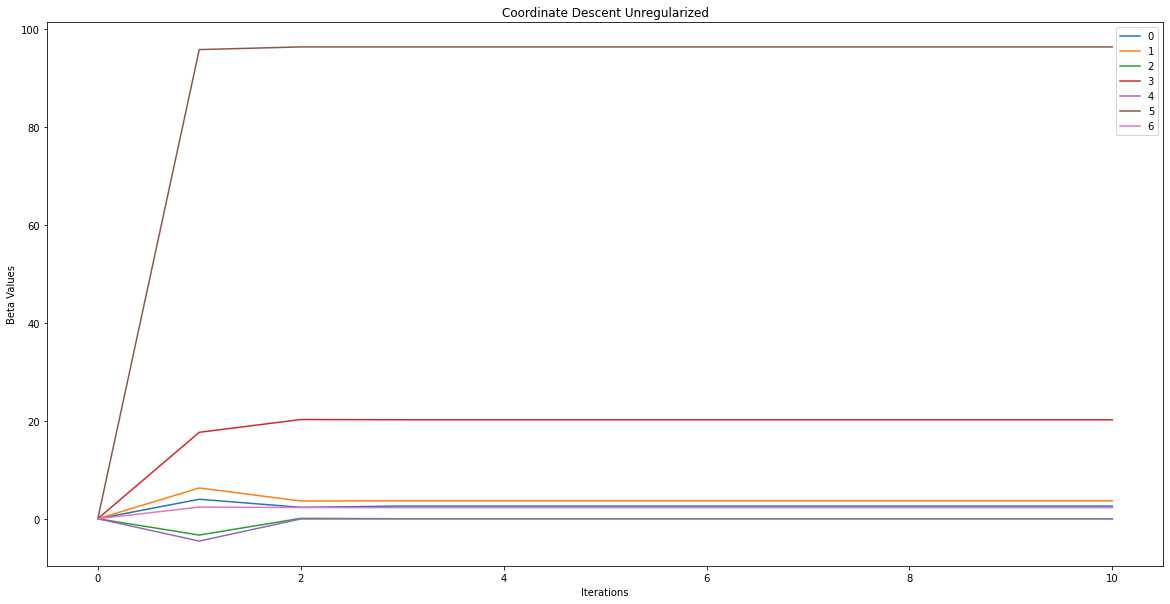

In [14]:
beta_list,_ = coordinate_descent_lasso(x_train,y_train,np.zeros((7,1)),lamda=0.01,iter=10)
print("The final updated beta values are:\n",beta_list[-1])
df = pd.DataFrame(list(map(np.ravel, beta_list)))
df.plot(title='Coordinate Descent Unregularized',figsize=(20,10),xlabel="Iterations",ylabel="Beta Values")
plt.show()

### 2. Compare the plots of the unregularized and regularized CD

Both the final beta values and graphs for regularized and unregularized Coordinate Descent is observed to be the same, therefore, I conclude that there's no difference in the plots observed for both the methods.

### 3. How is the Coordinate Descent method different from SGD and Newton’s method?

In SGD all the beta parameters are updated at once, i.e. a part of the training dataset is used to update all betas for a particular iteration. Stochastic Gradient descent is a first-order method, that is, it uses only the first derivative of the objective function at every step. 

Newton’s method is a second-order method, as it uses both the first derivative and the second derivative [Hessian]. Newton’s method is applied on the derivative of the cost function, not on the cost function itself. This is important because Newton’s method requires the analytical form of the derivative of any input function we use, as we’ll see shortly. Therefore, this means that the cost function we use must be differentiable twice, not just once, as was the case for stochastic gradient descent.

Coordinate descent is an optimization algorithm that successively minimizes along coordinate directions to find the minimum of a function. At each iteration, the algorithm determines a coordinate or coordinate block via a coordinate selection rule, then exactly or inexactly minimizes over the corresponding coordinate hyperplane while fixing all other coordinates or coordinate blocks. Thus it updates only one beta parameter in each iteration.

####  In which case is it advisable to use the CD method?

The idea behind coordinate descent methods is simple. If f is a k-dimensional function, we can minimize f by successively minimizing each of the individual dimensions of f in a cyclic fashion, while holding the values of f in the other dimensions fixed. This approach is sometimes referred to as cyclic coordinate descent. The primary advantage of this approach is that it takes an arbitrarily complex k-dimensional problem and reduces it to a collection of k one-dimensional problems.